# **German House Prices**

In [13]:
#import the required packages 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics 


In [14]:
#read the csv file using read_csv

dataset = pd.read_csv("germany_housing_data.csv")

In [15]:
#present the information about the variables contained in the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   10552 non-null  int64  
 1   Price                    10552 non-null  float64
 2   Type                     10150 non-null  object 
 3   Living_space             10552 non-null  float64
 4   Lot                      10552 non-null  float64
 5   Usable_area              5568 non-null   float64
 6   Free_of_Relation         6983 non-null   object 
 7   Rooms                    10552 non-null  float64
 8   Bedrooms                 6878 non-null   float64
 9   Bathrooms                8751 non-null   float64
 10  Floors                   7888 non-null   float64
 11  Year_built               9858 non-null   float64
 12  Furnishing_quality       7826 non-null   object 
 13  Year_renovated           5349 non-null   float64
 14  Condition             

In [16]:
#disply the first 5 entries of the dataset to understand the type of data present 

dataset.head()

,Number,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [17]:
#learn the categorical variables present in the dataset

categorical_data = [col for col in dataset.columns if dataset[col].dtypes == 'O']
print(categorical_data)

['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garagetype']


In [18]:
#learn the numerical variables present in the dataset

numerical_data = [col for col in dataset.columns if dataset[col].dtypes != 'O']
print(numerical_data)

['Number', 'Price', 'Living_space', 'Lot', 'Usable_area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors', 'Year_built', 'Year_renovated', 'Energy_consumption', 'Garages']


<AxesSubplot:>

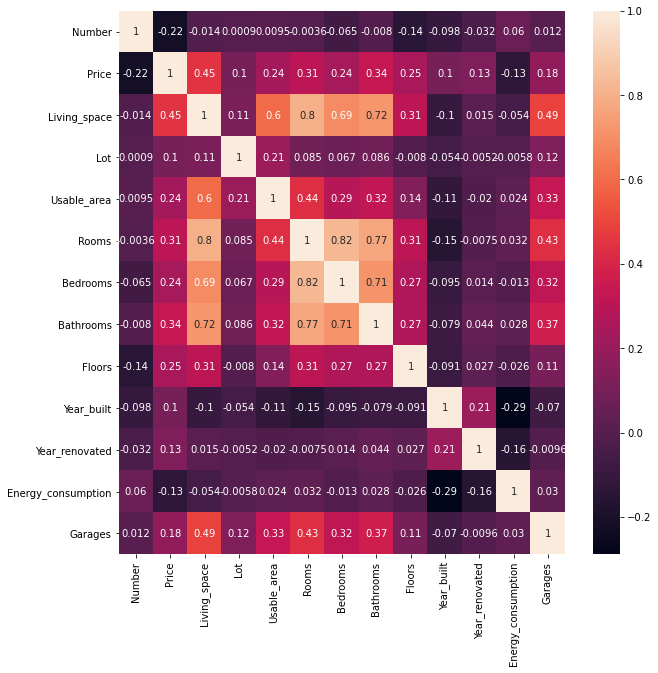

In [19]:
#study the orrelation between the variables using heatmap and corr()

plt.figure(figsize=(10,10))
co_relation = dataset.corr()
sns.heatmap(co_relation,annot=True)

In [30]:
#remove unwanted variables from the dataframe

dataset = dataset.drop(['Number','Usable_area'],axis=1)
dataset.head()

,Price,Type,Living_space,Lot,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,705.691151,Multiple dwelling,10.295630,229.0,01.10.2020,2.345208,1.732051,1.000000,1.414214,44.777226,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,1.414214,Parking lot
1,703.562364,Mid-terrace house,11.871394,517.0,01.01.2021,2.449490,1.732051,1.414214,NaN,44.654227,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,2.645751,Parking lot
2,865.447861,Farmhouse,12.762837,82.0,01.07.2020,2.236068,1.732051,1.414214,2.000000,44.866469,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.000000,Garage
3,508.920426,Farmhouse,11.832160,814.0,nach Vereinbarung,2.000000,NaN,1.414214,1.414214,43.588989,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.000000,Garage
4,684.835747,Multiple dwelling,10.723805,244.0,sofort,2.121320,1.414214,1.000000,NaN,44.362146,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.000000,Garage


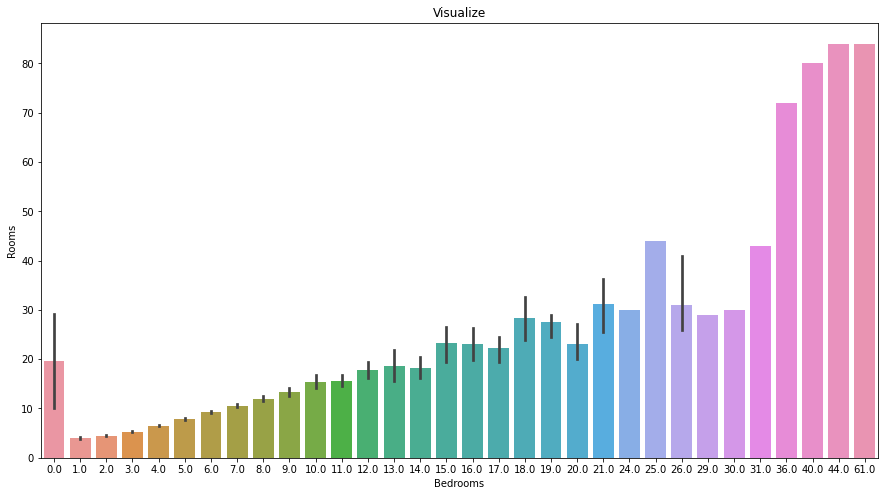

In [20]:
#Correlation between bedrooms and rooms So we plot the relationship between these two variables

f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x="Bedrooms", y="Rooms", data=dataset)
ax.set_title("Visualize")
plt.show()

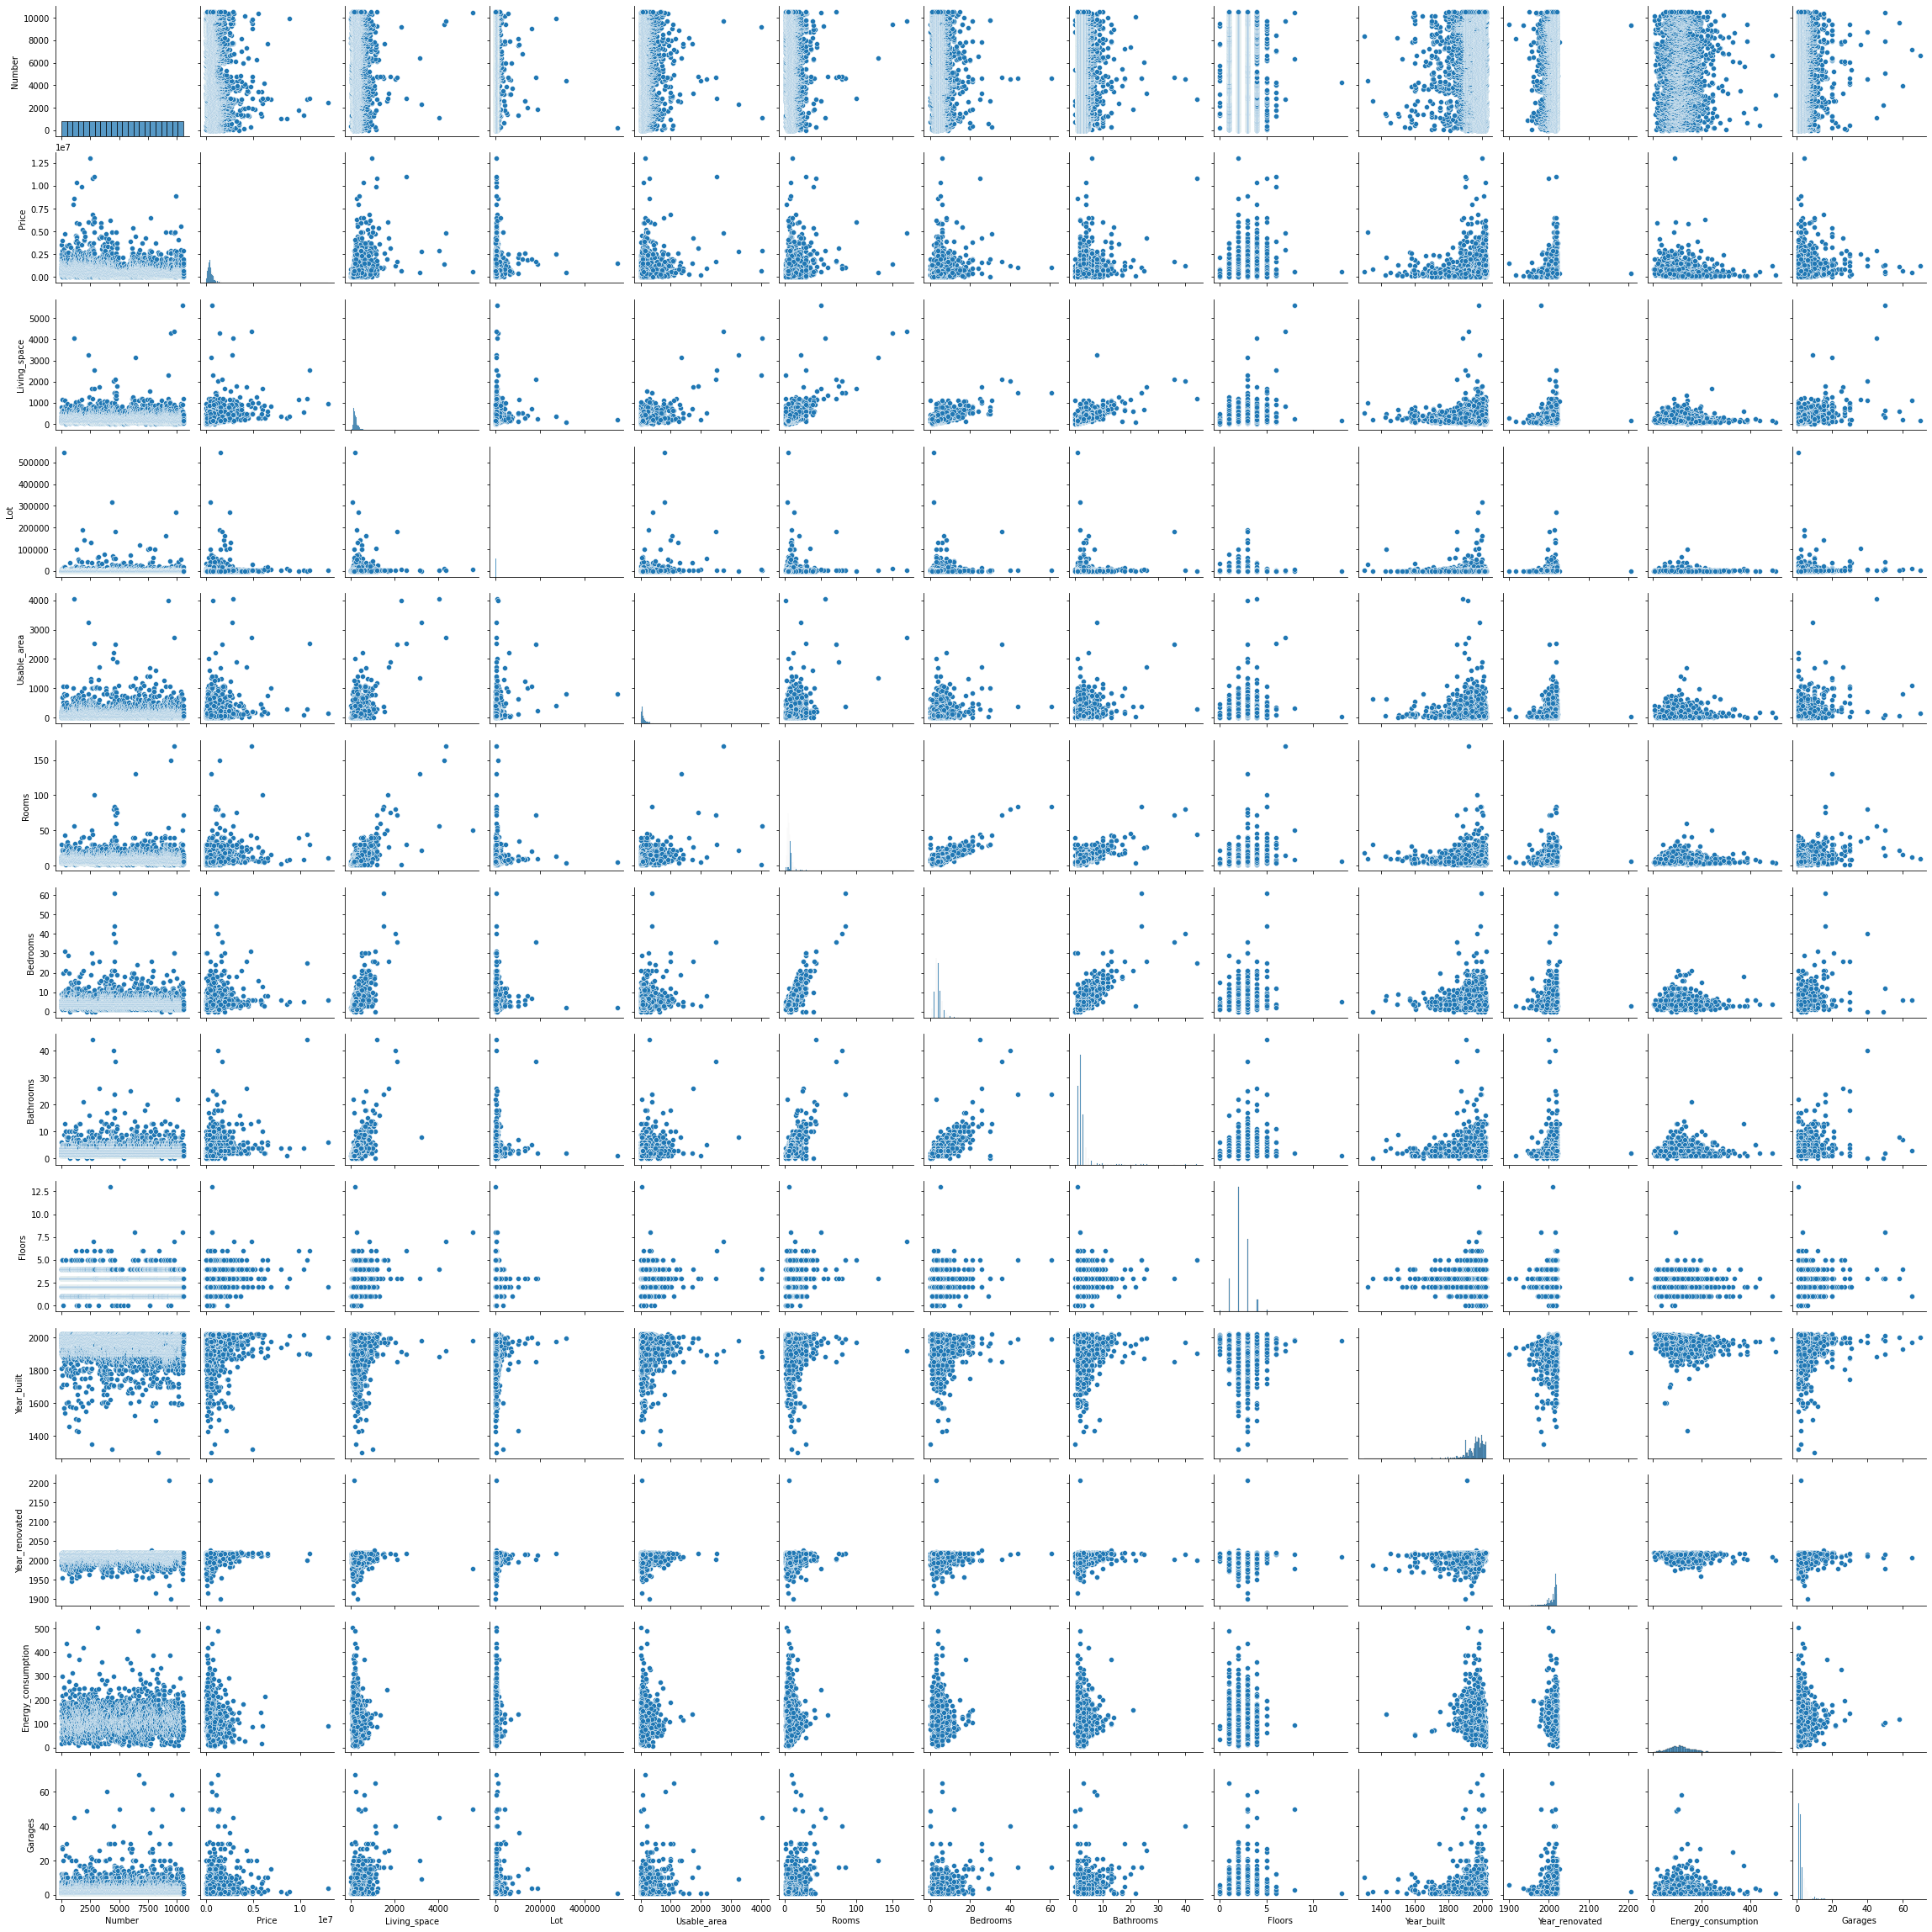

In [ ]:
#distribution of variables present in the dataset

sns.pairplot(dataset)
plt.show()

In [21]:
#EDA on few variables
#Type of dwelling

dataset.Type.value_counts()

Mid-terrace house       4324
Duplex                  2127
Single dwelling         1169
Farmhouse                573
Villa                    396
Multiple dwelling        379
Residential property     367
Special property         358
Bungalow                 249
Corner house             201
Castle                     7
Name: Type, dtype: int64

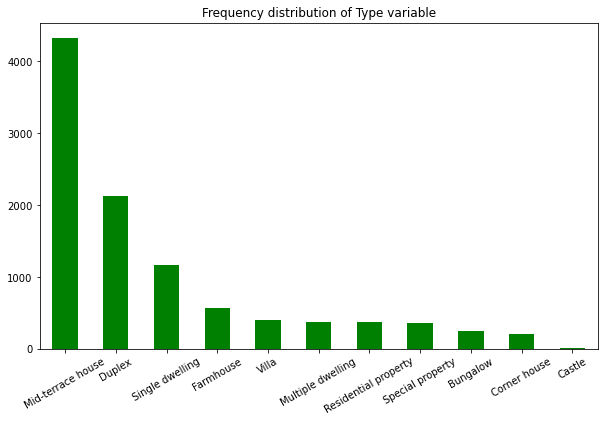

In [22]:
#Frequency distribution of type variable

f, ax = plt.subplots(figsize=(10, 6))
ax = dataset.Type.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of Type variable")
ax.set_xticklabels(dataset.Type.value_counts().index, rotation=30)
plt.show()


In [23]:
#EDA on Condition of the house

dataset.Condition.value_counts()


modernized                              4440
refurbished                             1305
dilapidated                             1167
maintained                              1069
renovated                               1034
fixer-upper                              588
first occupation after refurbishment     461
first occupation                          97
by arrangement                            56
as new                                    12
Name: Condition, dtype: int64

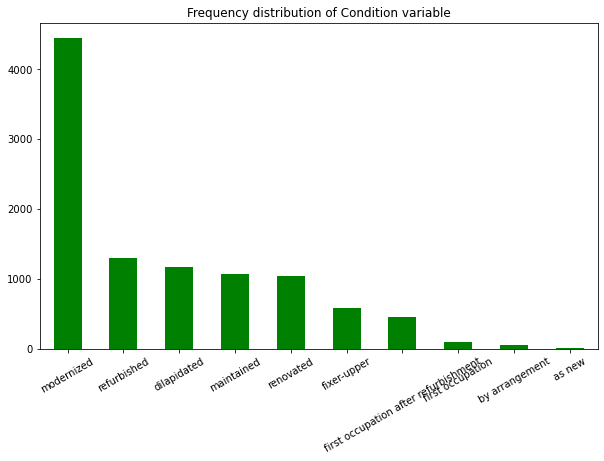

In [24]:
#frequency distribution of Condition variable

f, ax = plt.subplots(figsize=(10, 6))
ax = dataset.Condition.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of Condition variable")
ax.set_xticklabels(dataset.Condition.value_counts().index, rotation=30)
plt.show()

In [25]:
#EDA on type of heating in the house

dataset.Heating.value_counts()

stove heating           5976
heat pump                985
central heating          894
oil heating              746
underfloor heating       418
night storage heater     322
district heating         229
wood-pellet heating      116
electric heating          95
floor heating             95
gas heating               51
cogeneration units        23
solar heating             18
Name: Heating, dtype: int64

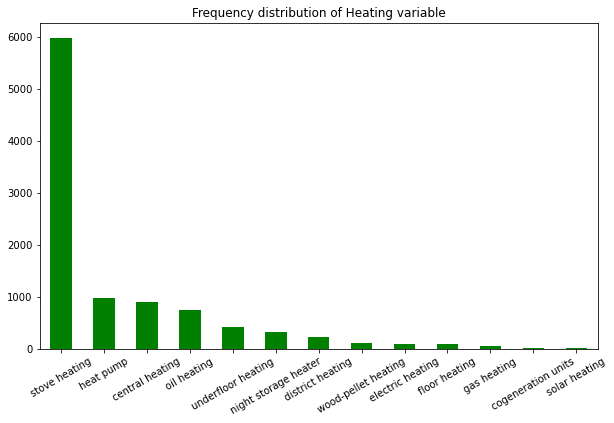

In [26]:
#Frequency distribution of Heating variable

f, ax = plt.subplots(figsize=(10, 6))
ax = dataset.Heating.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of Heating variable")
ax.set_xticklabels(dataset.Heating.value_counts().index, rotation=30)
plt.show()

C:\Users\sruthi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


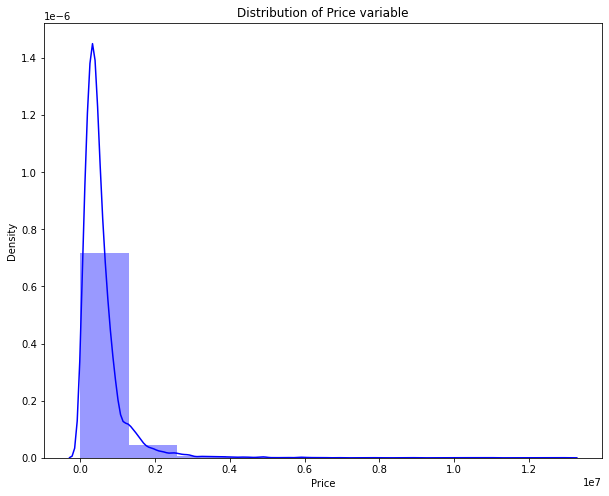

In [27]:
#Distribution of target variable: Price

f, ax = plt.subplots(figsize=(10,8))
x = dataset['Price']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of Price variable")
plt.show()

C:\Users\sruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


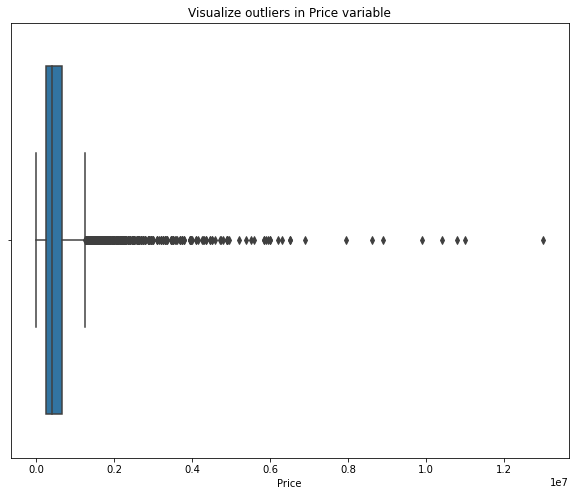

In [28]:
#Outlier check of target variable

f, ax = plt.subplots(figsize=(10,8))
x = dataset['Price']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Price variable")
plt.show()

In [29]:
#Handling skewed data by applying sqrt transformation on the skewed variables

dataset.Price = np.sqrt(dataset.Price)
dataset.Living_space = np.sqrt(dataset.Living_space)
dataset.Rooms = np.sqrt(dataset.Rooms)
dataset.Bedrooms = np.sqrt(dataset.Bedrooms)
dataset.Bathrooms = np.sqrt(dataset.Bathrooms)
dataset.Floors = np.sqrt(dataset.Floors)
dataset.Year_built = np.sqrt(dataset.Year_built)
dataset.Year_renovated = np.sqrt(dataset.Year_renovated)
dataset.Energy_consumption = np.sqrt(dataset.Energy_consumption)
dataset.Garages = np.sqrt(dataset.Garages)

In [31]:
#check for missing values

dataset.isnull().sum()

Price                         0
Type                        402
Living_space                  0
Lot                           0
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64

In [32]:
#Handle the missing values using Simple Imputation, most-frequent method

imp = SimpleImputer(strategy="most_frequent")
newdata = pd.DataFrame(imp.fit_transform(dataset))
newdata.columns = dataset.columns
newdata.head()


,Price,Type,Living_space,Lot,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,705.691,Multiple dwelling,10.2956,229,01.10.2020,2.34521,1.73205,1,1.41421,44.7772,...,Gas,available,demand certificate,10.6771,D,Baden-Württemberg,Bodenseekreis,Bermatingen,1.41421,Parking lot
1,703.562,Mid-terrace house,11.8714,517,01.01.2021,2.44949,1.73205,1.41421,1.41421,44.6542,...,Gas,not required by law,demand certificate,10.6771,D,Baden-Württemberg,Konstanz (Kreis),Engen,2.64575,Parking lot
2,865.448,Farmhouse,12.7628,82,01.07.2020,2.23607,1.73205,1.41421,2,44.8665,...,"Fernwärme, Bioenergie",available,demand certificate,10.6771,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1,Garage
3,508.92,Farmhouse,11.8322,814,nach Vereinbarung,2,1.73205,1.41421,1.41421,43.589,...,Strom,available,demand certificate,10.6771,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1,Garage
4,684.836,Multiple dwelling,10.7238,244,sofort,2.12132,1.41421,1,1.41421,44.3621,...,Öl,available,demand certificate,10.6771,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1,Garage


In [33]:
#Check the missing values again on handled data

newdata.isnull().sum()

Price                      0
Type                       0
Living_space               0
Lot                        0
Free_of_Relation           0
Rooms                      0
Bedrooms                   0
Bathrooms                  0
Floors                     0
Year_built                 0
Furnishing_quality         0
Year_renovated             0
Condition                  0
Heating                    0
Energy_source              0
Energy_certificate         0
Energy_certificate_type    0
Energy_consumption         0
Energy_efficiency_class    0
State                      0
City                       0
Place                      0
Garages                    0
Garagetype                 0
dtype: int64

In [34]:
#Encode all the categorical variables using One-Hot Encoding( similar to adding dummies)

encoder = ce.OneHotEncoder(cols=['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 
                                 'Energy_source', 'Energy_certificate', 'Energy_certificate_type','Energy_efficiency_class',
                                 'State','City','Place','Garagetype'])

newdata = encoder.fit_transform(newdata)

C:\Users\sruthi\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [35]:
#Split the target variable from the predictor variable

X = newdata.drop('Price', axis = 'columns')
y = newdata.Price

In [36]:
#Split the train and test data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train


,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Type_7,Type_8,Type_9,Type_10,...,Place_4761,Place_4762,Garages,Garagetype_1,Garagetype_2,Garagetype_3,Garagetype_4,Garagetype_5,Garagetype_6,Garagetype_7
3553,0,1,0,0,0,0,0,0,0,0,...,0,0,1.41421,0,0,1,0,0,0,0
2376,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6946,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3438,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2078,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6433,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3000,0,0,0,0,1,0,0,0,0,0,...,0,0,1.41421,0,0,1,0,0,0,0
276,0,0,0,1,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0


In [37]:
#Scaling the data variables to a range

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Data Mining

In [38]:
#Random Forest Regressor 

regressor = RandomForestRegressor(n_estimators=200,oob_score = True, random_state=0,max_depth = 20,min_samples_split = 10)
regressor.fit(X_train, y_train)
y_pred1 = regressor.predict(X_test)
print("Accuracy of Train set",regressor.score(X_train, y_train))
print("Accuracy of Test set",regressor.score(X_test, y_test))

Accuracy of Train set 0.8661182269517019
Accuracy of Test set 0.6036509986538572


Mean Absolute Error: 127.18260951237966
Mean Squared Error: 35472.63875192861
Root Mean Squared Error: 188.34181360475588


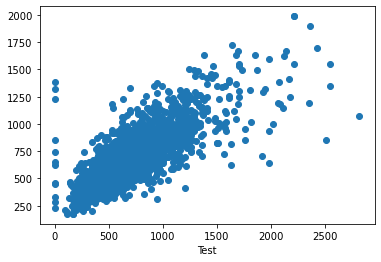

In [48]:
#Evaluation of Random Forest Regressor using RMSE and Plot

plt.scatter(y_test, y_pred1)
plt.xlabel("Test")
plt.ylabel("Prediction")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

In [40]:
#Gradient Boosting Regressor 

clf = GradientBoostingRegressor(n_estimators=400,max_depth = 5)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

In [42]:
#Evaluataion of Gradient Boosting Regressor

print("Train accuracy of Gradient Boosting Regression",clf.score(X_train, y_train))
print("Test accuracy of Gradient Boosting Regression",clf.score(X_test, y_test))

Train accuracy of Gradient Boosting Regression 0.8797106277863801
Test accuracy of Gradient Boosting Regression 0.7088658726947059


Mean Absolute Error: 107.84440925142057
Mean Squared Error: 26056.065970100874
Root Mean Squared Error: 161.41891453637294


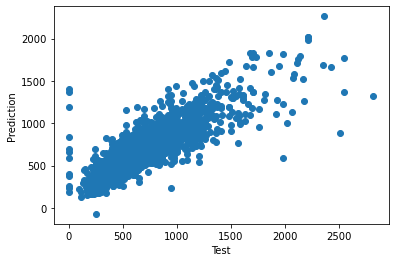

In [49]:
#Evaluation using RMSE and plot

plt.scatter(y_test, y_pred2)
plt.xlabel("Test")
plt.ylabel("Prediction")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

C:\Users\sruthi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


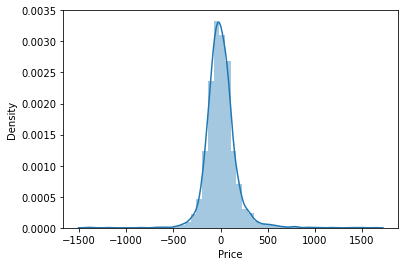

In [46]:
#Residual plot: Normality of the residuals is satisfied

sns.distplot((y_test - y_pred2), bins=50);
